In [27]:
from matplotlib import pyplot as plt
import torch
from root_dataset import Test_dataset
import albumentations as albu
import model
import random
import numpy as np
import cv2
np.random.seed(0)
random.seed(0)
torch.manual_seed(0)

In [28]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [29]:
height = 512
model_name = 'models/new_loss_model.pt'
model = torch.load(model_name,map_location=device)

In [30]:
def get_val_augmentation(height):
    trainaugmentation = albu.Compose([
        albu.Resize(height,height),
    ])
    return trainaugmentation

val_aug = get_val_augmentation(height)

In [50]:
test = Test_dataset(val_aug,'data',device)

test_loader = torch.utils.data.DataLoader(test, batch_size=10)

['segmented_image3.png', 'segmented_image2.png', 'segmented_image1.png', 'image4.png', 'image5.png', 'image1.png', 'image2.png', 'image3.png']


In [51]:
for inputs in test_loader:
    model.eval()
    outputs = model(inputs)

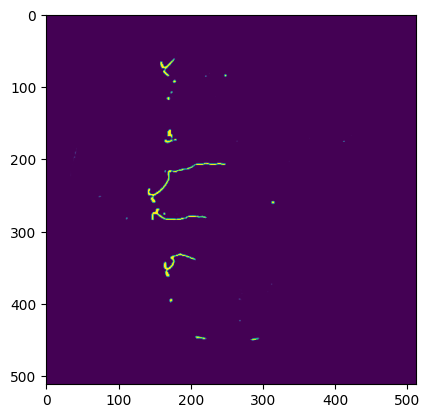

In [61]:
mask = outputs[-4]
mask.reshape(1, height, height)
mask = mask.cpu().permute(1,2,0).detach().numpy()
plt.imshow(mask)

In [62]:
cv2.imwrite('data/segmented_image5.png',mask * 255)

True

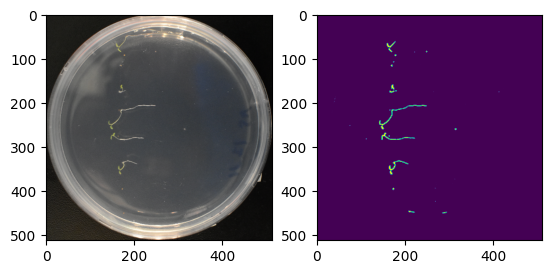

In [63]:
segmented_image = cv2.imread('data/segmented_image5.png', cv2.IMREAD_GRAYSCALE)

image = cv2.imread('data/image5.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image,(512,512))

f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image)
axarr[1].imshow(segmented_image)

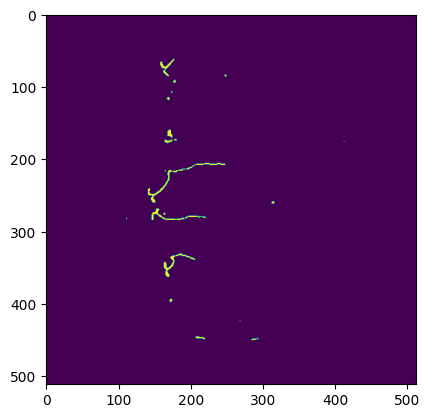

In [64]:
_, binary_image = cv2.threshold(segmented_image, 125, 255, cv2.THRESH_BINARY)
plt.imshow(binary_image)